# PeTS Equation of State - Binary Mixture (Pseudo Pure Fluid)

Original publication of the _perturbation theory for truncated and shifted Lennard-Jones fluids_ (PeTS) of M. Heier, S. Stephan, J. Liu, W.G. Chapman, H. Hasse, K. Langenbach, Mol. Phys. **116**, 2083 (2018);
https://doi.org/10.1080/00268976.2018.1447153

In [1]:
import numpy as np
from feos_pets.dft import *
from feos_pets.si import *
from feos_pets import *
import matplotlib.pyplot as plt
import pandas as pd

## Specifying PeTS Parameters

In [2]:
epsilon_k = 500.0 * KELVIN # value so high because `State.critical_point_binary_p()` 
sigma = 1.0 * ANGSTROM

## Definition of Reference Data

The vapor-liquid equilibrium reference data is taken from M. Heier, F. Diewald, R. Müller, K. Langenbach, H. Hasse, J. Chem. Eng. Data **66**, 3722 (2021); 
https://doi.org/10.1021/acs.jced.1c00350

The critical point from molecular simulation data is taken from J. Vrabec, G.K. Kedia, G. Fuchs, H. Hasse, Mol. Phys. **104**, 1509 (2006);
https://doi.org/10.1080/00268970600556774

In [3]:
# 
dataII_heier = np.array([
    [0.000000, 0.0505823],
    [0.076551, 0.0599571],
    [0.088870, 0.0557923],
    [0.135066, 0.0649758],
    [0.153544, 0.0598839],
    [0.199740, 0.0692199],
    [0.218219, 0.0641897],
    [0.264415, 0.0723026],
    [0.282893, 0.0685395],
    [0.338817, 0.0748877],
    [0.358744, 0.0731929],
    [0.426101, 0.0761749],
    [0.490775, 0.0769691],
    [0.555449, 0.0765049],
    [0.620124, 0.0740571],
    [0.651420, 0.0750161],
    [0.681158, 0.0707009],
    [0.717135, 0.0729537],
    [0.743313, 0.0666916],
    [0.781810, 0.0700998],
    [0.807987, 0.0622656],
    [0.846484, 0.0661813],
    [0.872662, 0.0580156],
    [0.907309, 0.0612395],
    [0.939705, 0.0546265],
    [0.962744, 0.0553251],
    [1.000000, 0.0504532]
])

dataIII_heier = np.array([
    [0.000000, 0.0505583], 
    [0.014606, 0.0463258], 
    [0.043879, 0.0406187], 
    [0.045419, 0.0474858], 
    [0.090845, 0.0354279], 
    [0.110093, 0.0428926], 
    [0.154749, 0.0314184], 
    [0.174767, 0.0384549], 
    [0.219424, 0.0290074], 
    [0.239442, 0.0342899], 
    [0.284098, 0.0274881], 
    [0.304116, 0.0307086], 
    [0.361739, 0.0282435], 
    [0.361739, 0.0263652], 
    [0.424045, 0.0259072], 
    [0.424348, 0.0264348], 
    [0.510458, 0.0256461], 
    [0.581739, 0.0265739], 
    [0.582959, 0.0259360], 
    [0.648696, 0.0286609], 
    [0.650435, 0.0265043], 
    [0.704481, 0.0311691], 
    [0.704481, 0.0272798], 
    [0.769156, 0.0348149], 
    [0.769156, 0.0287112], 
    [0.833830, 0.0390708], 
    [0.833830, 0.0309110], 
    [0.898504, 0.0435584], 
    [0.898504, 0.0346184], 
    [0.948550, 0.0396112], 
    [0.960401, 0.0479372], 
    [0.979457, 0.0449927], 
    [1.000000, 0.0506103]
])

dataIV_heier = np.array([
    [0.356403, 0.1009460],
    [0.355287, 0.1106950],
    [0.337595, 0.0929715],
    [0.329819, 0.1132230],
    [0.310350, 0.0856877],
    [0.289048, 0.1105170],
    [0.274023, 0.0784979],
    [0.259352, 0.1063850],
    [0.223724, 0.0708589],
    [0.218135, 0.0992702],
    [0.181808, 0.0921316],
    [0.165041, 0.0639687],
    [0.147576, 0.0849097],
    [0.116139, 0.0779828],
    [0.085401, 0.0709942],
    [0.077018, 0.0559927],
    [0.054663, 0.0637009],
    [0.025322, 0.0566590],
    [0.000871, 0.0506872]])

# Critical point data extracted from Vrabec et al. (2018)
T_c_vrabec = 1.0779
p_c_vrabec = np.exp(3.1664 - 5.9809 / T_c_vrabec + 0.01498 / T_c_vrabec**3) 
rho_c_vrabec = 0.3190

## Definition of PeTS Equation of State

In [4]:
petsII  = PetsFunctional(PetsParameters.from_lists(epsilon_k=[epsilon_k/KELVIN]*2,                     sigma=[sigma/ANGSTROM]*2, k_ij=np.array([[0.0, 0.15], [0.15, 0.0]])))
petsIII = PetsFunctional(PetsParameters.from_lists(epsilon_k=[epsilon_k/KELVIN]*2,                     sigma=[sigma/ANGSTROM]*2, k_ij=np.array([[0.0, -0.25], [-0.25, 0.0]])))
petsIV  = PetsFunctional(PetsParameters.from_lists(epsilon_k=[0.6*epsilon_k/KELVIN, epsilon_k/KELVIN], sigma=[sigma/ANGSTROM]*2))

In [5]:
cp = State.critical_point_pure(eos=petsIV)

T_c_pets = cp[0].temperature
p_c_pets = cp[0].pressure()
rho_c_pets = cp[0].density

T_c_pets_red = cp[0].temperature / epsilon_k

print(cp)
print(0.9*T_c_vrabec*epsilon_k)

[T = 326.71467 K, ρ = 513.38386 kmol/m³, T = 544.52445 K, ρ = 513.38386 kmol/m³]
485.05500000000006 K


In [6]:
cp = State.critical_point_binary_p(eos=petsIV, pressure=0.1*(epsilon_k * KB / sigma**3), verbosity=Verbosity.Iter)

In [7]:
#pe = PhaseEquilibrium.tp_flash(eos=petsIV, temperature=0.9*T_c_vrabec*epsilon_k, pressure=0.1*(epsilon_k * KB / sigma**3), feed=np.array([0.3, 0.7])*MOL)

#print(pe.liquid.density)
#print(pe.liquid.mass_density())

## Binary Phase Diagram - Pressure-Composition

!!! Reduced temperature is calculated with critical temperature of Vrabec et al. (2006) !!!

In [8]:
dia_pII  = PhaseDiagramBinary.new_pxy(eos=petsII,  temperature=0.9*T_c_vrabec*epsilon_k)
dia_pIII = PhaseDiagramBinary.new_pxy(eos=petsIII, temperature=0.9*T_c_vrabec*epsilon_k)
dia_pIV  = PhaseDiagramBinary.new_pxy(eos=petsIV,  temperature=0.9*T_c_vrabec*epsilon_k)

In [9]:
vleII = PhaseEquilibrium.dew_point_tx(eos=petsII, temperature=0.9*T_c_vrabec*epsilon_k, vapor_molefracs=np.array([0.25, 0.75]), pressure=0.07*(epsilon_k*KB/sigma**3))
cpII = State.critical_point(eos=petsII, moles=np.array([0.5, 0.5])*MOL)
print('Pressure II:  ', vleII.liquid.pressure()/(epsilon_k * KB / sigma**3))

vleIII = PhaseEquilibrium.bubble_point_tx(eos=petsIII, temperature=0.9*T_c_vrabec*epsilon_k, liquid_molefracs=np.array([0.25, 0.75]), pressure=0.04*(epsilon_k*KB/sigma**3))
cpIII = State.critical_point(eos=petsIII, moles=np.array([0.5, 0.5])*MOL)
print('Pressure III: ', vleIII.liquid.pressure()/(epsilon_k * KB / sigma**3))

#vleIV = PhaseEquilibrium.bubble_point_tx(eos=petsIV, temperature=0.9*T_c_vrabec*epsilon_k, liquid_molefracs=np.array([0.1, 0.9]), pressure=0.074*(epsilon_k*KB/sigma**3))
vleIV = PhaseEquilibrium.dew_point_tx(eos=petsIV, temperature=0.9*T_c_vrabec*epsilon_k, vapor_molefracs=np.array([0.25, 0.75]), pressure=0.074*(epsilon_k*KB/sigma**3), liquid_molefracs=np.array([0.1, 0.9]))
#cpIV = State.critical_point(eos=petsIV, moles=np.array([0.5, 0.5])*MOL)
print('Pressure IV:  ', vleIV.liquid.pressure()/(epsilon_k * KB / sigma**3))

vleIV.vapor.pressure()/(epsilon_k*KB/sigma**3)

Pressure II:   0.06633065556160649
Pressure III:  0.03374578304124371
Pressure IV:   0.07477566840594595


0.07477566840594717

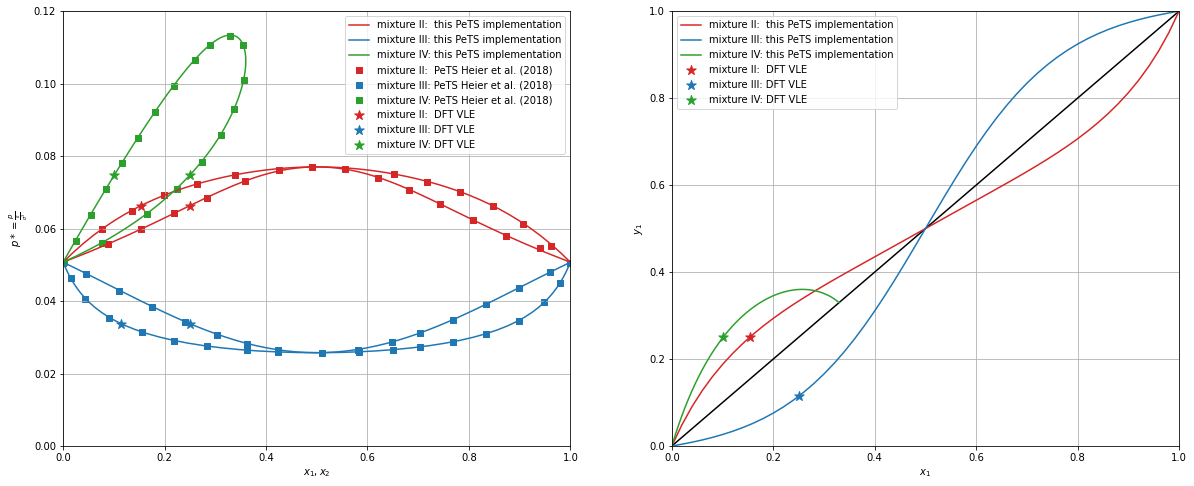

In [10]:
f, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].plot(dia_pII.liquid_molefracs,  dia_pII.pressure/(epsilon_k * KB / sigma**3),  color='tab:red',   label='mixture II:  this PeTS implementation')
ax[0].plot(dia_pII.vapor_molefracs,   dia_pII.pressure/(epsilon_k * KB / sigma**3),  color='tab:red')
ax[0].plot(dia_pIII.liquid_molefracs, dia_pIII.pressure/(epsilon_k * KB / sigma**3), color='tab:blue',  label='mixture III: this PeTS implementation')
ax[0].plot(dia_pIII.vapor_molefracs,  dia_pIII.pressure/(epsilon_k * KB / sigma**3), color='tab:blue')
ax[0].plot(dia_pIV.liquid_molefracs,  dia_pIV.pressure/(epsilon_k * KB / sigma**3),  color='tab:green', label='mixture IV: this PeTS implementation')
ax[0].plot(dia_pIV.vapor_molefracs,   dia_pIV.pressure/(epsilon_k * KB / sigma**3),  color='tab:green')
ax[0].scatter(dataII_heier[:,0],  dataII_heier[:,1],  marker='s', color='tab:red',   label='mixture II:  PeTS Heier et al. (2018)')
ax[0].scatter(dataIII_heier[:,0], dataIII_heier[:,1], marker='s', color='tab:blue',  label='mixture III: PeTS Heier et al. (2018)')
ax[0].scatter(dataIV_heier[:,0],  dataIV_heier[:,1],  marker='s', color='tab:green', label='mixture IV: PeTS Heier et al. (2018)')
ax[0].scatter([vleII.liquid.molefracs[0],  vleII.vapor.molefracs[0]],  [vleII.liquid.pressure()/(epsilon_k * KB / sigma**3)] * 2,  marker='*', color='tab:red',   s=100, label='mixture II:  DFT VLE')
ax[0].scatter([vleIII.liquid.molefracs[0], vleIII.vapor.molefracs[0]], [vleIII.liquid.pressure()/(epsilon_k * KB / sigma**3)] * 2, marker='*', color='tab:blue',  s=100, label='mixture III: DFT VLE')
ax[0].scatter([vleIV.liquid.molefracs[0],  vleIV.vapor.molefracs[0]],  [vleIV.liquid.pressure()/(epsilon_k * KB / sigma**3)] * 2,  marker='*', color='tab:green', s=100, label='mixture IV: DFT VLE')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 0.12)
ax[0].set_xlabel(r'$x_1, x_2$')
ax[0].set_ylabel(r'$p* = \frac{p}{\frac{\epsilon}{\sigma^3}}$')
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].plot([0, 1], [0, 1], color='black')
ax[1].plot(dia_pII.liquid_molefracs,  dia_pII.vapor_molefracs,  color='tab:red',   label='mixture II:  this PeTS implementation')
ax[1].plot(dia_pIII.liquid_molefracs, dia_pIII.vapor_molefracs, color='tab:blue',  label='mixture III: this PeTS implementation')
ax[1].plot(dia_pIV.liquid_molefracs,  dia_pIV.vapor_molefracs,  color='tab:green', label='mixture IV: this PeTS implementation')
ax[1].scatter(vleII.liquid.molefracs[0],  vleII.vapor.molefracs[0],  marker='*', color='tab:red',   s=100, label='mixture II:  DFT VLE')
ax[1].scatter(vleIII.liquid.molefracs[0], vleIII.vapor.molefracs[0], marker='*', color='tab:blue',  s=100, label='mixture III: DFT VLE')
ax[1].scatter(vleIV.liquid.molefracs[0],  vleIV.vapor.molefracs[0],  marker='*', color='tab:green', s=100, label='mixture IV: DFT VLE')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].set_xlabel(r'$x_1$')
ax[1].set_ylabel(r'$y_1$');
ax[1].legend(loc='upper left')
ax[1].grid()

In [11]:
vleIV.liquid.molefracs
vleIV.liquid.pressure()/(epsilon_k * KB / sigma**3)

vleIV.liquid.pressure()/(epsilon_k * KB / sigma**3)

0.07477566840594595

# PeTS Density Functional Theory - Binary Mixture

In [12]:
solver = DFTSolver().picard_iteration().anderson_mixing(tol=1e-10, max_iter=100)
dftII  = PlanarInterface.from_tanh(vle=vleII,  n_grid=2048, l_grid=50*sigma, critical_temperature=cp.temperature).solve(solver)
dftIII = PlanarInterface.from_tanh(vle=vleIII, n_grid=2048, l_grid=50*sigma, critical_temperature=cp.temperature).solve(solver)
dftIV  = PlanarInterface.from_tanh(vle=vleIV,  n_grid=2048, l_grid=50*sigma, critical_temperature=cp.temperature).solve(solver)

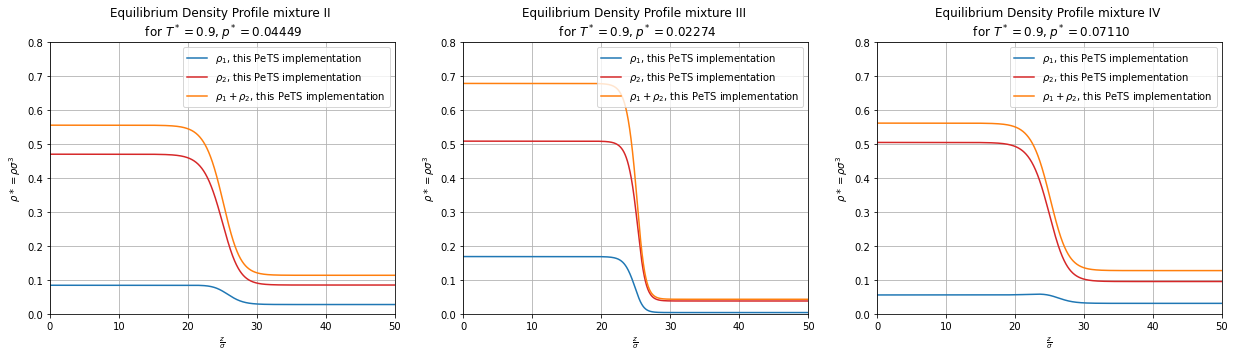

In [13]:
f, ax = plt.subplots(1,3, figsize=(21,5))

ax[0].plot(dftII.z/sigma, (dftII.density*NAV*sigma**3)[0,::-1],                                        color='tab:blue',   label=r'$\rho_1$'+', this PeTS implementation')
ax[0].plot(dftII.z/sigma, (dftII.density*NAV*sigma**3)[1,::-1],                                        color='tab:red',    label=r'$\rho_2$'+', this PeTS implementation')
ax[0].plot(dftII.z/sigma, (dftII.density*NAV*sigma**3)[0,::-1] + (dftII.density*NAV*sigma**3)[1,::-1], color='tab:orange', label=r'$\rho_1 + \rho_2$'+', this PeTS implementation')
ax[0].set_title('Equilibrium Density Profile mixture II ' + '\n for ' + r'$T^* = 0.9, p^* = 0.04449$')
ax[0].set_xlabel(r'$\frac{z}{\sigma}$')
ax[0].set_ylabel(r'$\rho* = \rho \sigma^3$')
ax[0].set_xlim(0, 50)
ax[0].set_ylim(0, 0.8)
ax[0].legend(loc='upper right')
ax[0].grid()

ax[1].plot(dftIII.z/sigma, (dftIII.density*NAV*sigma**3)[0,::-1],                                         color='tab:blue',   label=r'$\rho_1$'+', this PeTS implementation')
ax[1].plot(dftIII.z/sigma, (dftIII.density*NAV*sigma**3)[1,::-1],                                         color='tab:red',    label=r'$\rho_2$'+', this PeTS implementation')
ax[1].plot(dftIII.z/sigma, (dftIII.density*NAV*sigma**3)[0,::-1] + (dftIII.density*NAV*sigma**3)[1,::-1], color='tab:orange', label=r'$\rho_1 + \rho_2$'+', this PeTS implementation')
ax[1].set_title('Equilibrium Density Profile mixture III ' + '\n for ' + r'$T^* = 0.9, p^* = 0.02274$')
ax[1].set_xlabel(r'$\frac{z}{\sigma}$')
ax[1].set_ylabel(r'$\rho* = \rho \sigma^3$')
ax[1].set_xlim(0, 50)
ax[1].set_ylim(0, 0.8)
ax[1].legend(loc='upper right')
ax[1].grid()

ax[2].plot(dftIV.z/sigma, (dftIV.density*NAV*sigma**3)[0,::-1],                                        color='tab:blue', label=r'$\rho_1$'+', this PeTS implementation')
ax[2].plot(dftIV.z/sigma, (dftIV.density*NAV*sigma**3)[1,::-1],                                        color='tab:red', label=r'$\rho_2$'+', this PeTS implementation')
ax[2].plot(dftIV.z/sigma, (dftIV.density*NAV*sigma**3)[0,::-1] + (dftIV.density*NAV*sigma**3)[1,::-1], color='tab:orange', label=r'$\rho_1 + \rho_2$'+', this PeTS implementation')
ax[2].set_title('Equilibrium Density Profile mixture IV ' + '\n for ' + r'$T^* = 0.9, p^* = 0.07110$')
ax[2].set_xlabel(r'$\frac{z}{\sigma}$')
ax[2].set_ylabel(r'$\rho* = \rho \sigma^3$')
ax[2].set_xlim(0, 50)
ax[2].set_ylim(0, 0.8)
ax[2].legend(loc='upper right')
ax[2].grid()